## Prepare funtions, libraries for report and metrics

In [268]:
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor as gbr

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




def get_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test,y_pred))

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = get_rmse(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('______')
    return [mae, rmse]


def print_evaluate_rmse_mae(X_test, y_test, gbr_y_pred):
    r_squared = gbr.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, gbr_y_pred)
    mae = metrics.mean_absolute_error(y_test, gbr_y_pred)
    rmse = get_rmse(y_test, gbr_y_pred)
    print(f"R-squared value of GradientBoostingRegressor: {r_squared}")
    print(f"The mean squared error of GradientBoostingRegressor: {mse}")
    print(f"The mean absoluate error of GradientBoostingRegressor: {mae}")
    return [mae, rmse]


def show_df(
    title: str,
    columns: List[str],
    rows: List[list],
    label_x: str = "Metrics",
    label_y: str = "Value",
):
    width = 0.3
    x = np.arange(len(columns))
    fig, ax = plt.subplots(figsize=(10, 6))
    labels = ["NFT"]

    rects1 = ax.bar(x, rows[0], width, label=labels[0])
    # rects1 = ax.bar(x - width/2, rows[0], width, label=labels[0])
    # rects1 = ax.bar(x + width/2, rows[1], width, label=labels[1])
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend(loc='upper left')

## Prepare DataFrame

In [269]:
df = pd.read_csv("..\get_dataset\Dataset_v1.csv")
df.head()

,price_eth,price_usd,transaction_date,seller_address,background,eyes,mouth,clothes
0,0.0169,22.320857,2022-09-25T01:21:23,543,5,0,16,23
1,0.0169,22.320857,2022-09-25T01:22:11,543,7,10,13,23
2,0.0015,1.981141,2022-09-25T01:22:11,266,4,9,17,5
3,0.1000,132.076079,2022-09-25T01:22:11,200,23,8,10,8
4,0.0080,10.566086,2022-09-25T01:22:47,681,23,5,9,16


In [270]:
length = len(df.sort_values(by=['price_usd']))

print(length * 0.1)
first_10_percents = df.sort_values(by=['price_usd']).index[:int(length*0.1)]
last_10_percents = df.sort_values(by=['price_usd']).index[-int(length*0.1):]
first_10_percents
df.drop(first_10_percents, axis=0, inplace=True)
df.drop(last_10_percents, axis=0, inplace=True)
df

147.9


,price_eth,price_usd,transaction_date,seller_address,background,eyes,mouth,clothes
0,0.0169,22.320857,2022-09-25T01:21:23,543,5,0,16,23
1,0.0169,22.320857,2022-09-25T01:22:11,543,7,10,13,23
2,0.0015,1.981141,2022-09-25T01:22:11,266,4,9,17,5
4,0.0080,10.566086,2022-09-25T01:22:47,681,23,5,9,16
5,0.0169,22.320857,2022-09-25T01:22:59,543,7,9,11,9
...,...,...,...,...,...,...,...,...
1472,0.0051,6.749897,2022-09-25T06:19:47,462,18,18,0,21
1475,0.0650,86.028103,2022-09-25T06:20:59,154,18,11,18,21
1476,0.0838,110.910077,2022-09-25T06:21:35,516,17,14,13,16
1477,0.0187,24.668252,2022-09-25T01:51:23,751,8,1,17,6


In [271]:
df['eth (usd)'] = df['price_usd'] / df['price_eth']
df.drop(['price_eth', 'transaction_date'], axis = 1, inplace=True)

In [272]:
df.dropna(inplace=True)

In [273]:
df.sort_values(by=['price_usd'])

,price_usd,seller_address,background,eyes,mouth,clothes,eth (usd)
618,1.190051,720,5,7,16,16,1322.279390
596,1.190051,786,15,27,16,8,1322.279390
615,1.190051,720,18,7,16,16,1322.279390
599,1.190051,786,15,23,7,8,1322.279390
412,1.190288,554,0,0,0,0,1322.542486
...,...,...,...,...,...,...,...
278,129.609164,891,18,6,16,25,1322.542486
402,130.930384,467,18,0,10,26,1322.542486
1436,131.027418,955,0,9,0,8,1323.509278
1430,131.027418,519,15,6,10,8,1323.509278


In [274]:
from sklearn.preprocessing import OneHotEncoder
df_ohe = df.copy()
for feature in ['background', 'eyes', 'mouth', 'clothes']:
    ohe = OneHotEncoder()
    transformed = ohe.fit_transform(df_ohe[[feature]])
    labels = []
    for el in ohe.categories_[0]:
        labels.append(feature + str(el))
    df_ohe[labels] = transformed.toarray()
df_ohe

,price_usd,seller_address,background,eyes,mouth,clothes,eth (usd),background0,background1,background2,...,clothes18,clothes19,clothes20,clothes21,clothes22,clothes23,clothes24,clothes25,clothes26,clothes27
0,22.320857,543,5,0,16,23,1320.760794,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,22.320857,543,7,10,13,23,1320.760794,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.981141,266,4,9,17,5,1320.760794,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.566086,681,23,5,9,16,1320.760794,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.320857,543,7,9,11,9,1320.760794,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,6.749897,462,18,18,0,21,1323.509278,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,86.028103,154,18,11,18,21,1323.509278,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,110.910077,516,17,14,13,16,1323.509278,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,24.668252,751,8,1,17,6,1319.157841,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
df_ohe.drop(['background', 'eyes', 'mouth', 'clothes'], axis=1, inplace=True)

In [276]:
df_ohe

,price_usd,seller_address,eth (usd),background0,background1,background2,background3,background4,background5,background6,...,clothes18,clothes19,clothes20,clothes21,clothes22,clothes23,clothes24,clothes25,clothes26,clothes27
0,22.320857,543,1320.760794,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,22.320857,543,1320.760794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.981141,266,1320.760794,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.566086,681,1320.760794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.320857,543,1320.760794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,6.749897,462,1323.509278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,86.028103,154,1323.509278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,110.910077,516,1323.509278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,24.668252,751,1319.157841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:], df.iloc[:, 0],test_size=0.3,random_state=42)

## Check by LinearRegression

In [278]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


LinearRegression_test = print_evaluate(y_test, y_pred)

MAE: 25.95727501364287
MSE: 1059.3115333238147
RMSE: 32.547066431920015
R2 Square 0.00938035761886069
______


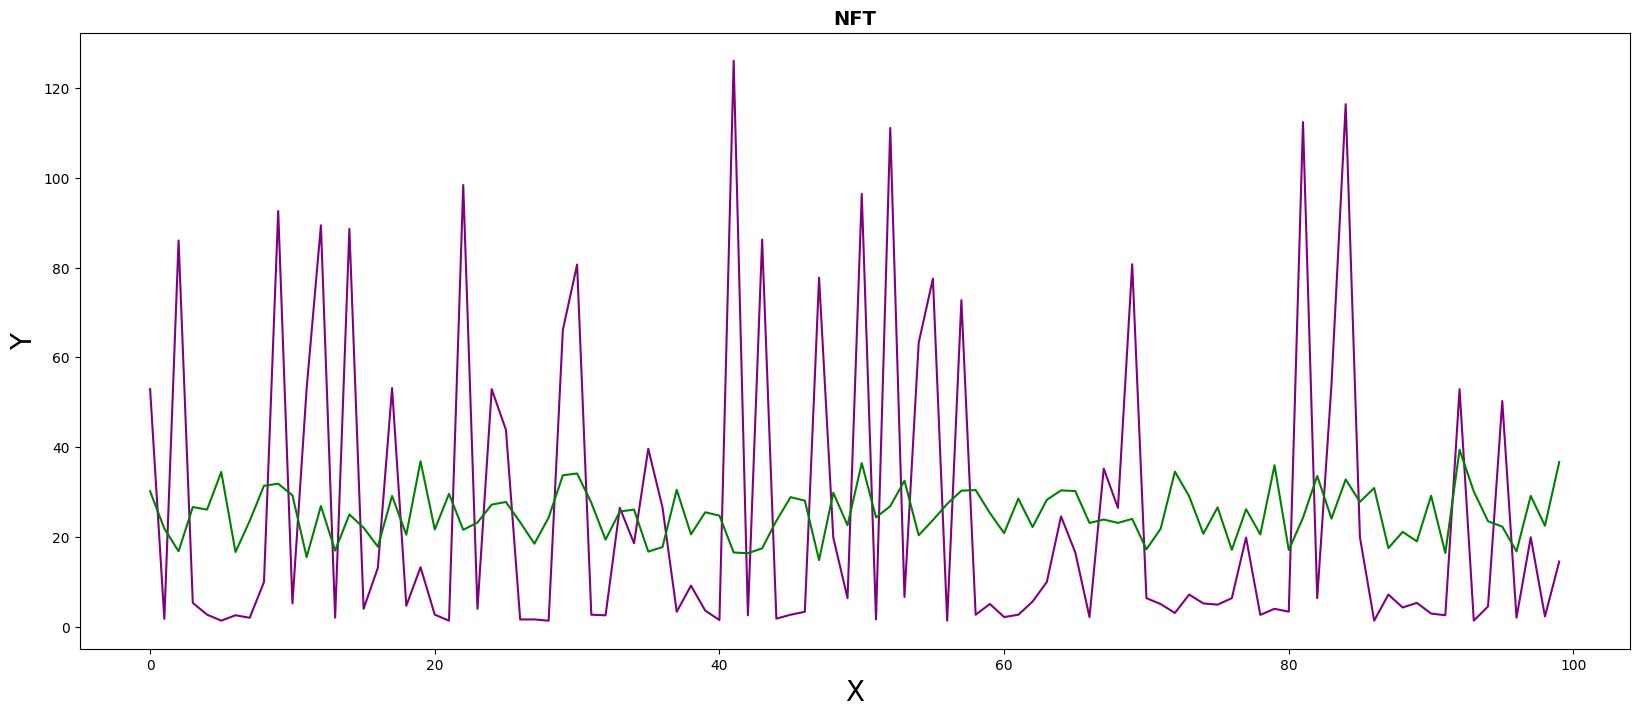

In [279]:
plt.figure(figsize = (20, 8))
plt.plot(y_test.to_numpy(dtype=object)[:100], color = "purple")
plt.plot(y_pred[:100], color = "green")
plt.title("NFT", fontsize = 14, fontweight = "bold") #updated here
plt.ylabel("Y",fontsize = 20)
plt.xlabel("X",fontsize = 20)

plt.show()

## Check by GradientBoostingRegressor

In [280]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_pred = gbr.predict(X_test)

GradientBoostingRegressor_test = print_evaluate_rmse_mae(X_test, y_test, gbr_y_pred)


R-squared value of GradientBoostingRegressor: 0.16852806044494628
The mean squared error of GradientBoostingRegressor: 889.1281552712321
The mean absoluate error of GradientBoostingRegressor: 22.756737122616286


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

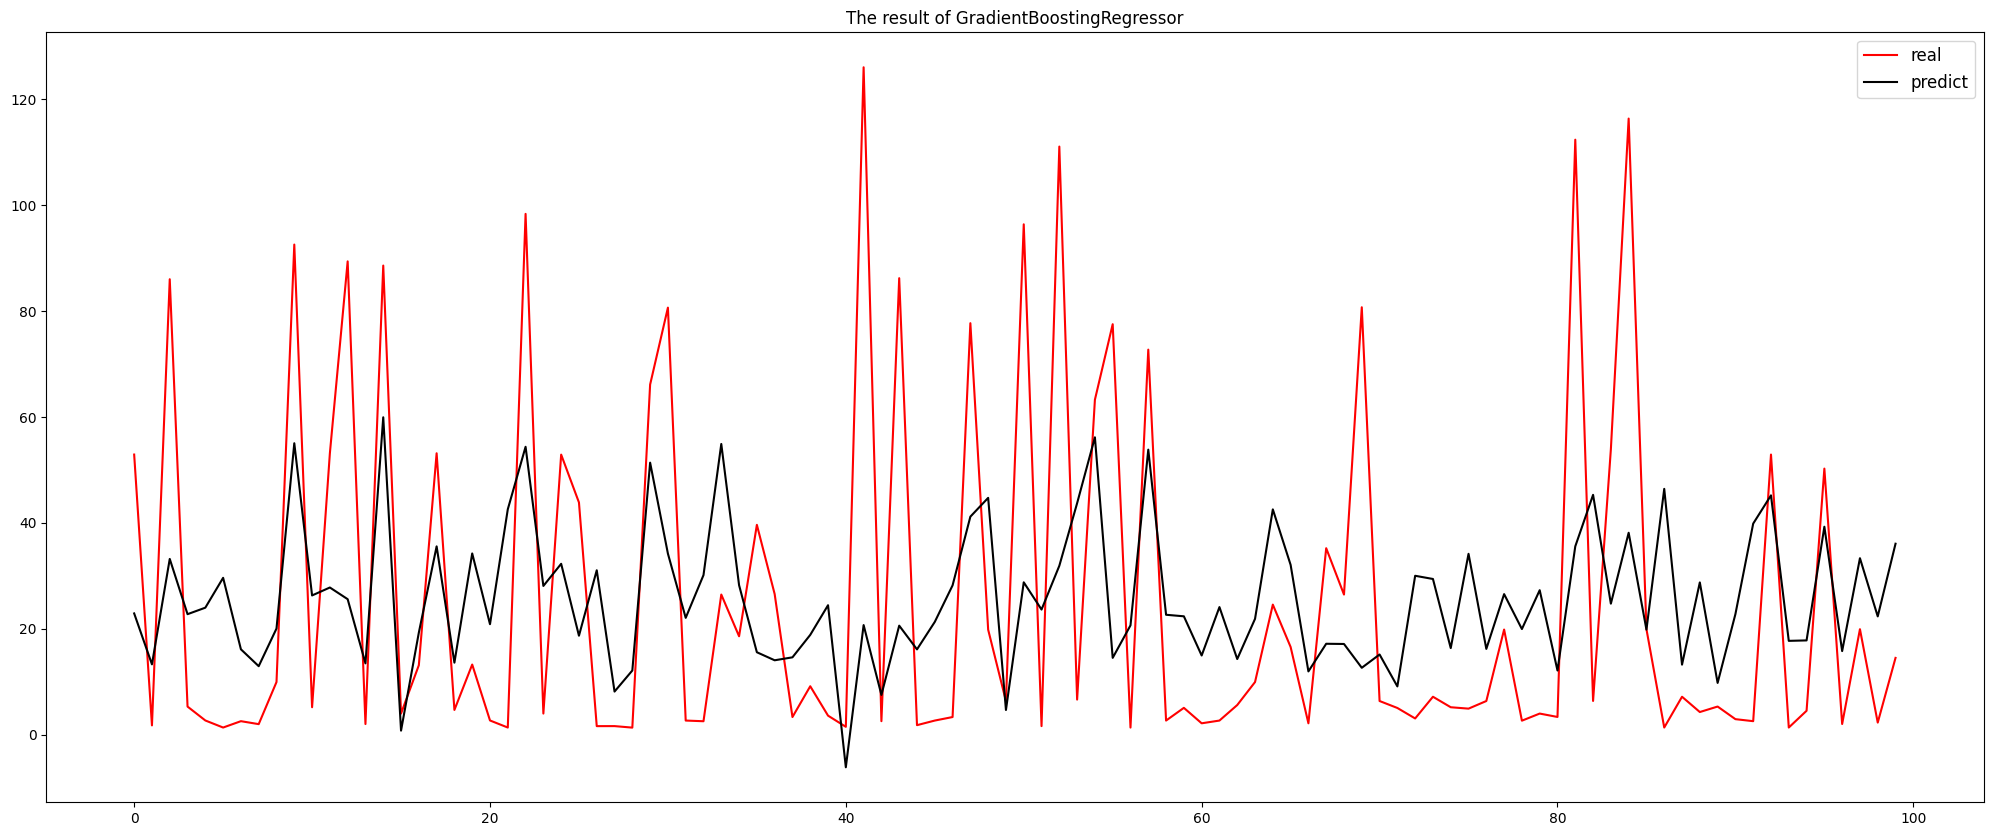

In [281]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='red')
plt.plot(gbr_y_pred[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

## Adding Scaler

In [282]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

## NN

In [283]:
nn_model = Sequential()

nn_model.add(Dense(7, input_dim=6, activation='relu'))
nn_model.add(Dense(3, activation='sigmoid'))
# nn_model.add(Dense(7, input_dim=5, activation='relu'))
# nn_model.add(Dense(3, activation='relu'))
# nn_model.add(Dense(1, activation='sigmoid'))


nn_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae', 'mse'])

nn_model_without_early=nn_model.fit(X_train, y_train, validation_split=0.35, epochs=30, batch_size=128)


Epoch 1/30


c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5/5 [==============================] - 1s 42ms/step - loss: 25.2259 - mae: 25.2259 - mse: 1620.1667 - val_loss: 23.7010 - val_mae: 23.7010 - val_mse: 1507.2555
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 25.2223 - mae: 25.2223 - mse: 1619.9827 - val_loss: 23.6974 - val_mae: 23.6974 - val_mse: 1507.0879
Epoch 3/30
5/5 [==============================] - 0s 9ms/step - loss: 25.2187 - mae: 25.2187 - mse: 1619.7993 - val_loss: 23.6939 - val_mae: 23.6939 - val_mse: 1506.9229
Epoch 4/30
5/5 [==============================] - 0s 9ms/step - loss: 25.2152 - mae: 25.2152 - mse: 1619.6287 - val_loss: 23.6904 - val_mae: 23.6904 - val_mse: 1506.7603
Epoch 5/30
5/5 [==============================] - 0s 9ms/step - loss: 25.2117 - mae: 25.2117 - mse: 1619.4540 - val_loss: 23.6870 - val_mae: 23.6870 - val_mse: 1506.5990
Epoch 6/30
5/5 [==============================] - 0s 12ms/step - loss: 25.2082 - mae: 25.2082 - mse: 1619.2781 - val_loss: 23.6836 - val_mae: 23.6836 - val_mse

In [284]:
mse_result = nn_model_without_early.history.get("mse")[29]
print(mse_result)

1612.14892578125


dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


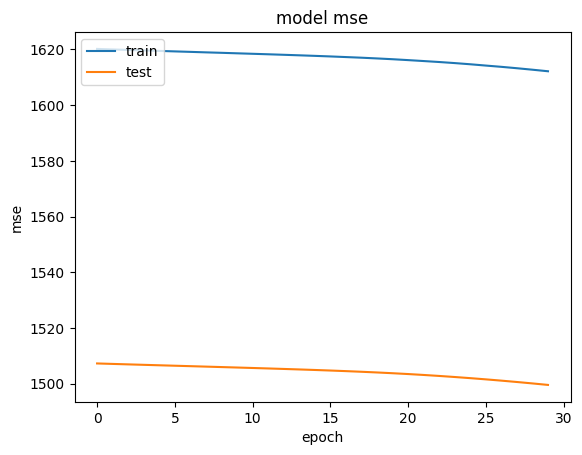

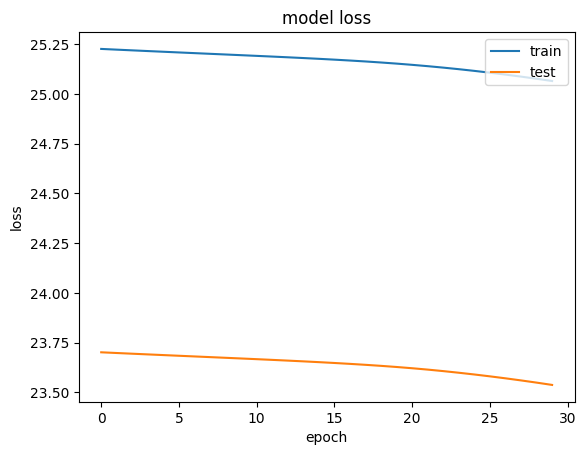

In [285]:
print(nn_model_without_early.history.keys())
# summarize history for accuracy
plt.plot(nn_model_without_early.history['mse'])
plt.plot(nn_model_without_early.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn_model_without_early.history['loss'])
plt.plot(nn_model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Check by RandomForestRegressor with scaling

#### Test set

In [286]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train,y_train)

rfr_y_pred = rfr.predict(X_test)

test = print_evaluate_rmse_mae(X_test, y_test, rfr_y_pred)

R-squared value of GradientBoostingRegressor: -0.015106831496843443
The mean squared error of GradientBoostingRegressor: 861.2471158399978
The mean absoluate error of GradientBoostingRegressor: 22.616763253029017


Text(0.5, 1.0, 'The result of RandomForestRegressor')

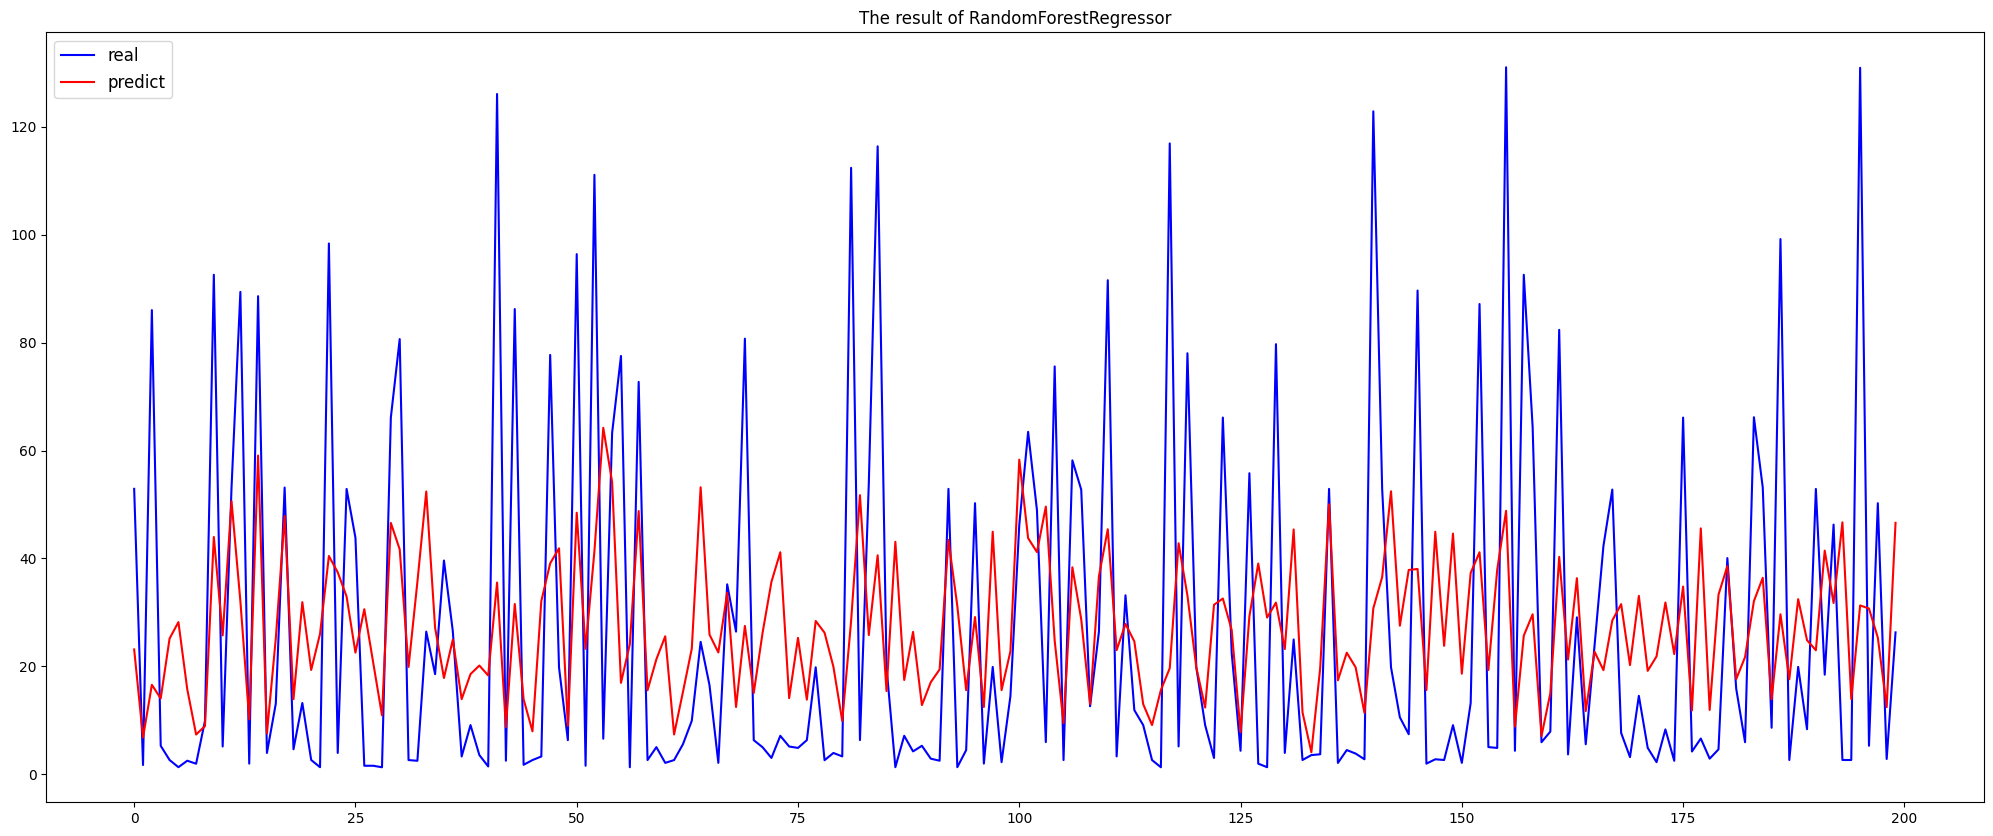

In [287]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:200],c='blue')
plt.plot(rfr_y_pred[:200],c='red')
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

#### Train set

In [288]:
from sklearn.ensemble import RandomForestRegressor

rfr_reg = RandomForestRegressor(n_estimators=200)  # maybe parameter tuning
rfr_reg.fit(X_train, y_train)

train_pred = rfr_reg.predict(X_train)


print('Testing set evaluation:\n______')
RandomForestRegressor_test = print_evaluate(y_test, rfr_y_pred)
print('==*******==')
print('Training set evaluation:\n_____')
RandomForestRegressor_train = print_evaluate(y_train, train_pred)




Testing set evaluation:
______
MAE: 22.616763253029017
MSE: 861.2471158399978
RMSE: 29.347012042795733
R2 Square 0.19460113190856165
______
==*******==
Training set evaluation:
_____
MAE: 8.30802484320581
MSE: 120.91715990632126
RMSE: 10.996233896490255
R2 Square 0.8754597675068503
______


Text(0.5, 1.0, 'The result of RandomForestRegressor')

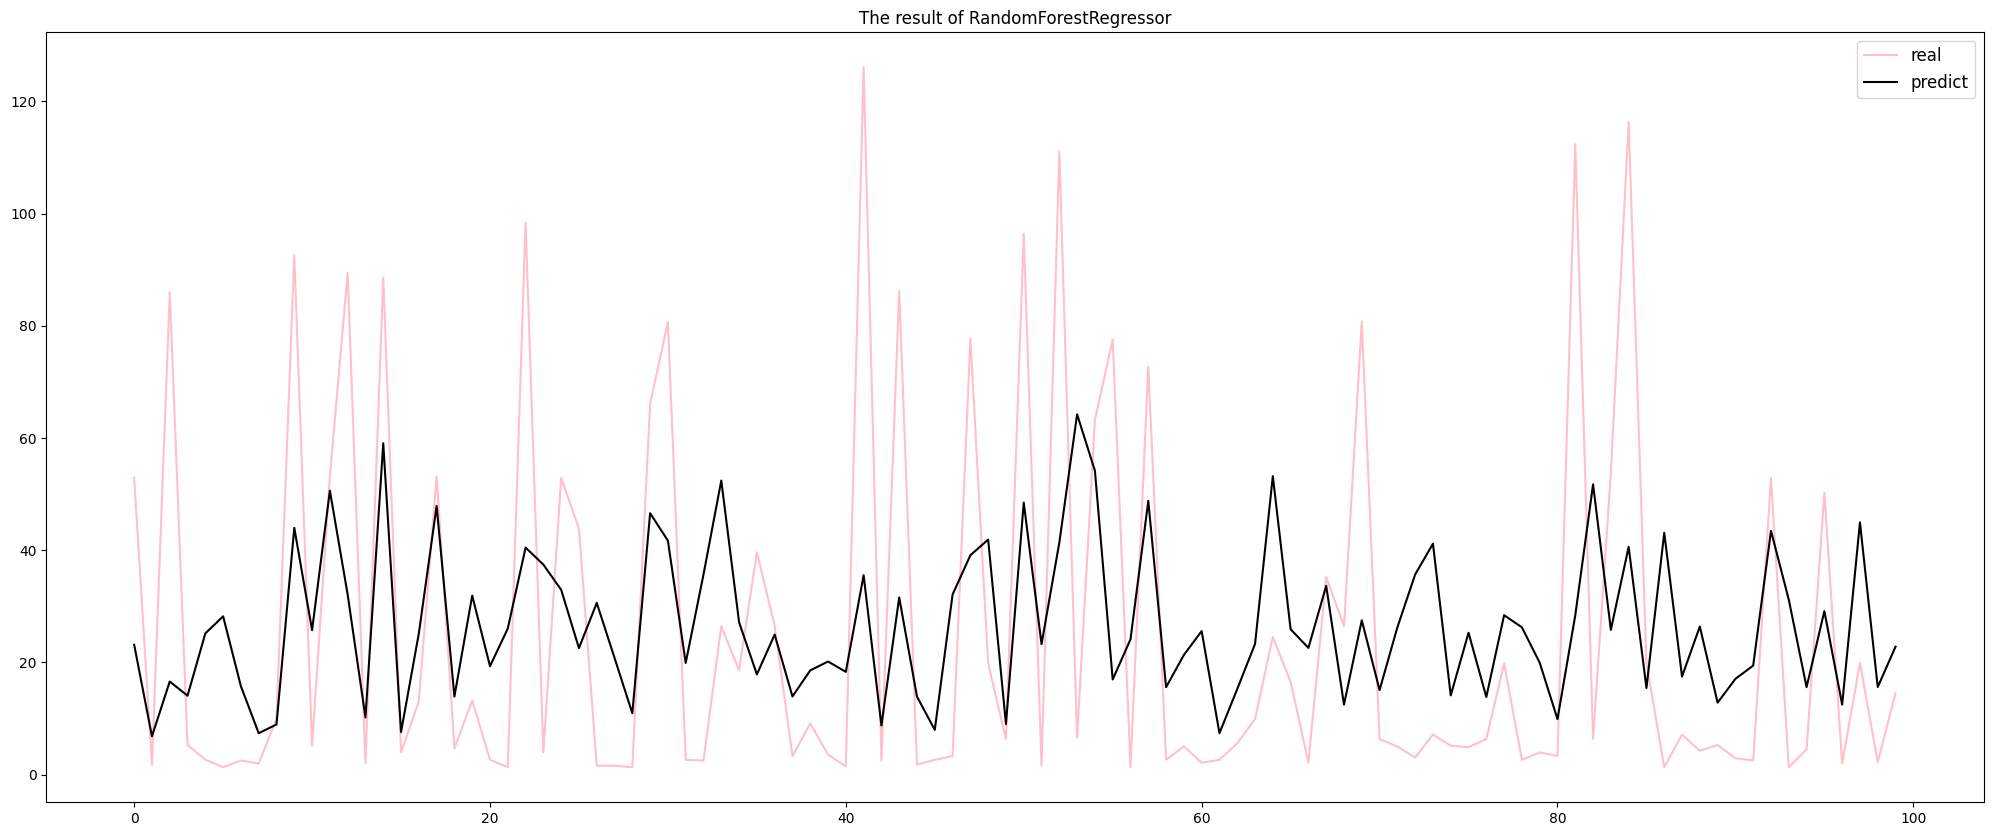

In [289]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='pink')
plt.plot(rfr_y_pred[:100],c='black')  #predicts

plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

## Check by XGBoost regressor

In [290]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(
    objective ='reg:linear',
    colsample_bytree = 0.3,
    learning_rate = 0.1,
    max_depth = 5,
    alpha = 10,
    n_estimators = 10
)
xgb_reg.fit(X_train,y_train)

xgb_y_pred = xgb_reg.predict(X_test)

XGBoost_regressor = print_evaluate(y_test, xgb_y_pred)

[23:28:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 22.52347968181489
MSE: 1079.3470367910193
RMSE: 32.85341742940937
R2 Square -0.009355927841312006
______


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

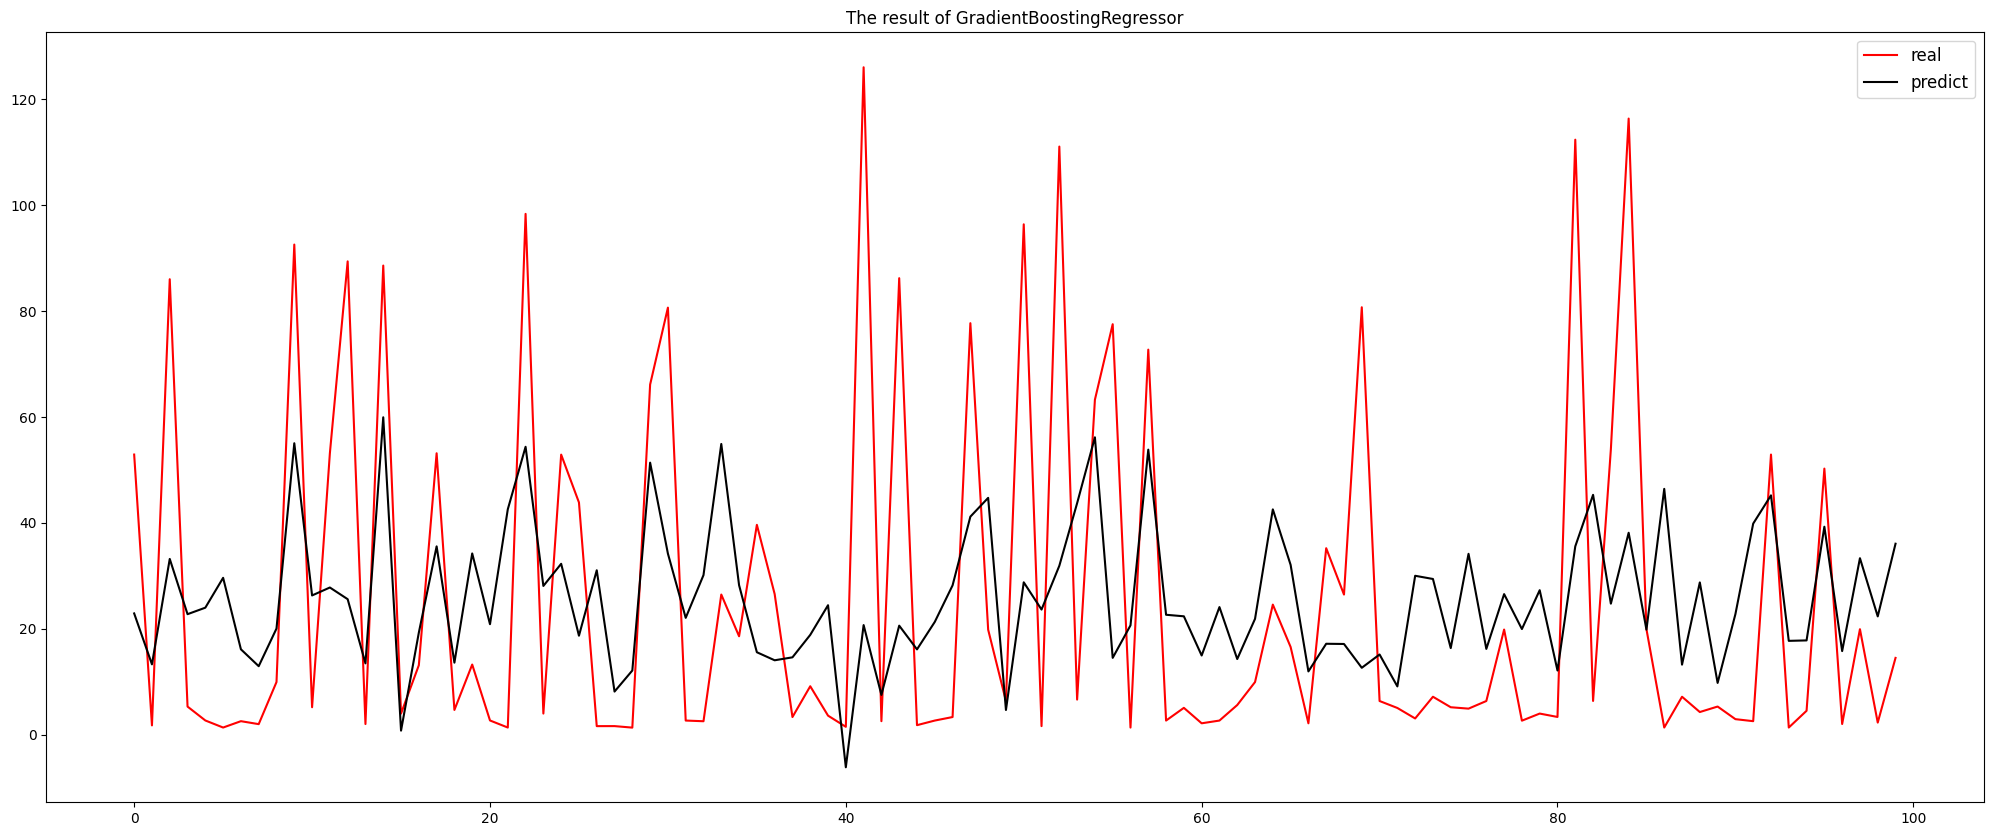

In [291]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='red')
plt.plot(gbr_y_pred[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

## Comparison of results before and after optimizations

* best values of metrics
* MAE -> 0.0
* MSE -> 0.0
* RMSE -> should be less 180
* R2 Square -> 1.0

#### LinearRegression

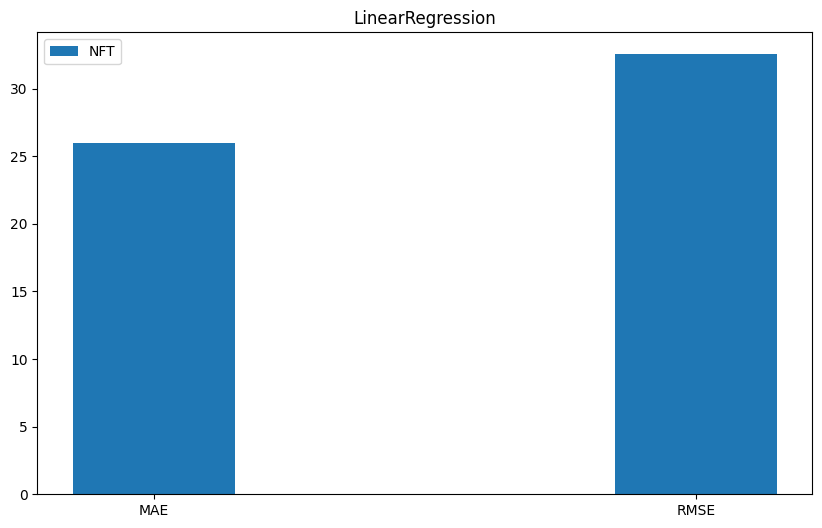

In [292]:
show_df(
    "LinearRegression",
    ["MAE", "RMSE"],
    [
        LinearRegression_test
    ]
)

#### GradientBoostingRegressor

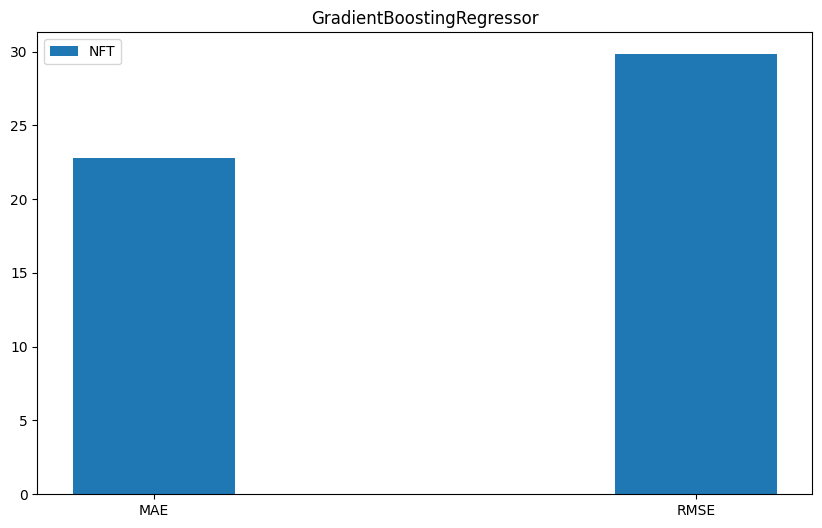

In [297]:
show_df(
    "GradientBoostingRegressor",
    ["MAE", "RMSE"],
    [
        GradientBoostingRegressor_test
    ]
)

#### RandomForestRegressor - Test set

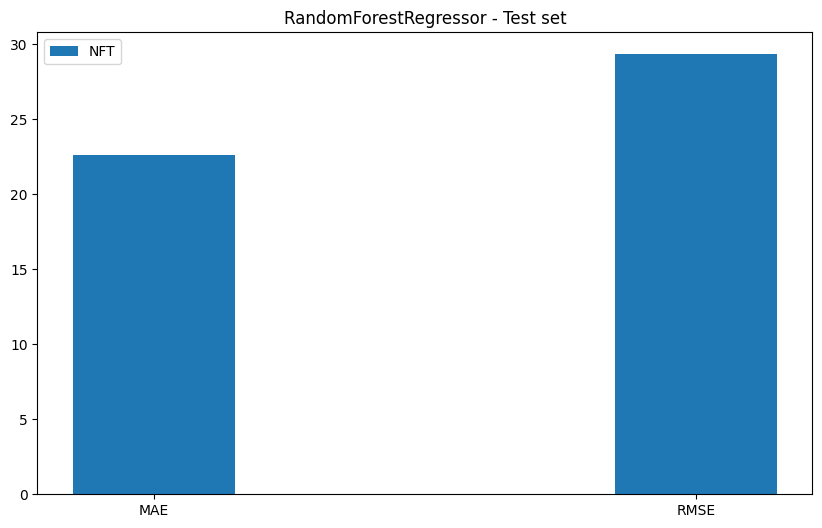

In [294]:
show_df(
    "RandomForestRegressor - Test set",
    ["MAE", "RMSE"],
    [
        RandomForestRegressor_test
    ]
)

#### RandomForestRegressor - Train set

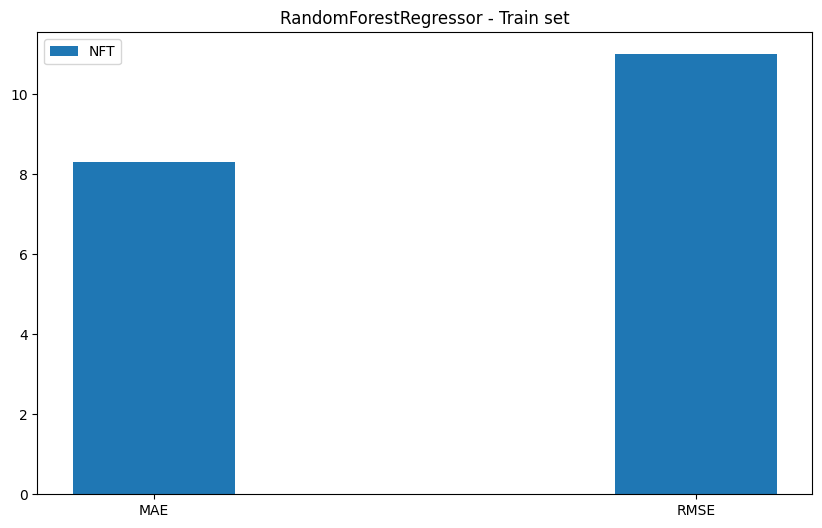

In [295]:
show_df(
    "RandomForestRegressor - Train set",
    ["MAE", "RMSE"],
    [
        RandomForestRegressor_train
    ]
)

## XGBoost regressor

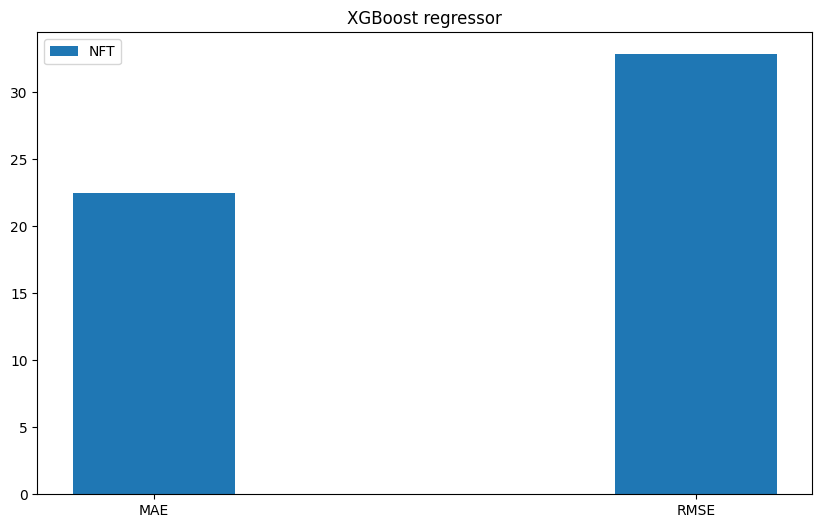

In [296]:
show_df(
    "XGBoost regressor",
    ["MAE", "RMSE"],
    [
        XGBoost_regressor
    ]
)

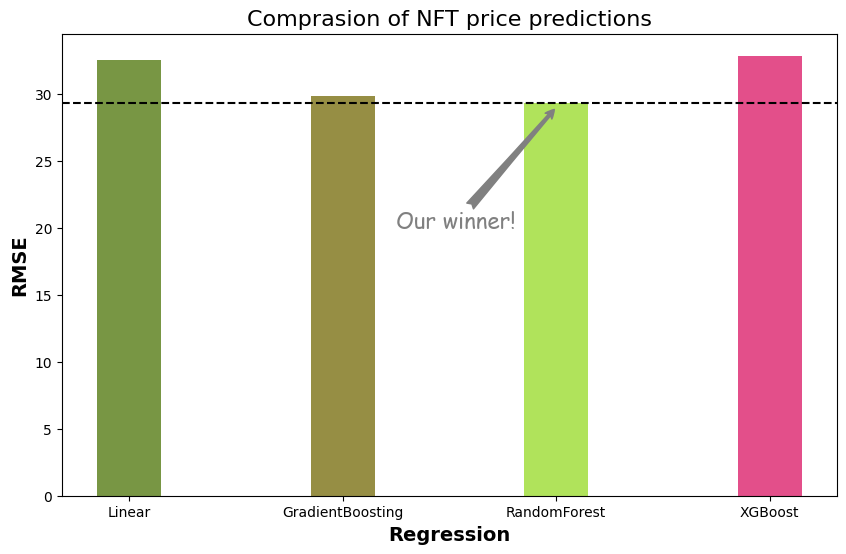

In [346]:
rmse = [LinearRegression_test[1],
    GradientBoostingRegressor_test[1],
    RandomForestRegressor_test[1],
    XGBoost_regressor[1]]

colors = ['#789644','#968E44', '#B0E35B', '#E34F8A']

df_rmse = pd.DataFrame([rmse],
    columns=['Linear', 'GradientBoosting',
            'RandomForest', 'XGBoost']
)

width = 0.3
x = np.arange(len(df_rmse.columns))
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x, df_rmse.iloc[0,:], width, color=colors)
ax.set_title('Comprasion of NFT price predictions', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(df_rmse.columns)
ax.set_xlabel('Regression', fontweight='bold', fontsize=14)
ax.set_ylabel('RMSE', fontweight='bold', fontsize=14)
ax.axhline(y = min(rmse), color = 'k', linestyle = '--')

ax.annotate('Our winner!', xy=(2, 29), 
            xytext=(1.25, 20),
            arrowprops=dict(arrowstyle='fancy', color='grey'),
            fontsize = 16,
            fontname='Comic Sans MS',
            color='grey'
            )

plt.show()